<a href="https://colab.research.google.com/github/elnemr19/titanic-survival-prediction/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
url ="https://www.kaggle.com/datasets/yasserh/titanic-dataset/data"

In [3]:
!kaggle datasets download -d yasserh/titanic-dataset

Dataset URL: https://www.kaggle.com/datasets/yasserh/titanic-dataset
License(s): CC0-1.0
  0% 0.00/22.0k [00:00<?, ?B/s]
100% 22.0k/22.0k [00:00<00:00, 24.4MB/s]


In [4]:
!unzip /content/titanic-dataset.zip

Archive:  /content/titanic-dataset.zip
  inflating: Titanic-Dataset.csv     


In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree


In [20]:
Data =pd.read_csv(r'/content/Titanic-Dataset.csv')

df =Data.copy()
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [21]:
df.drop(['PassengerId' ,'Name'] ,axis= 1,inplace=True)
df.shape

(891, 10)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Cabin     204 non-null    object 
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


In [23]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [24]:
df.describe(include='O')

,Sex,Ticket,Cabin,Embarked
count,891,891,204,889
unique,2,681,147,3
top,male,347082,B96 B98,S
freq,577,7,4,644


<Axes: ylabel='count'>

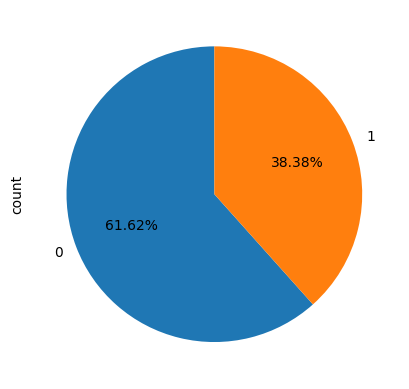

In [28]:
df['Survived'].value_counts().plot.pie(autopct='%2.2f%%', startangle=90)

In [29]:
df.isna().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0
Cabin,687
Embarked,2


In [12]:
df['Ticket'].value_counts()

,count
Ticket,
347082,7
CA. 2343,7
1601,7
3101295,6
CA 2144,6
...,...
9234,1
19988,1
2693,1


In [30]:
df.drop(['Ticket' ,'Cabin' ],axis= 1 ,inplace=True)

In [31]:
df['Age'] =np.ceil(df['Age'])
df['Age'].fillna(df['Age'].mean() ,inplace=True)

In [35]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

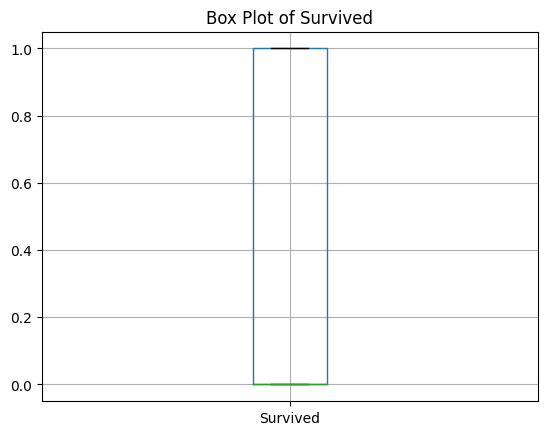

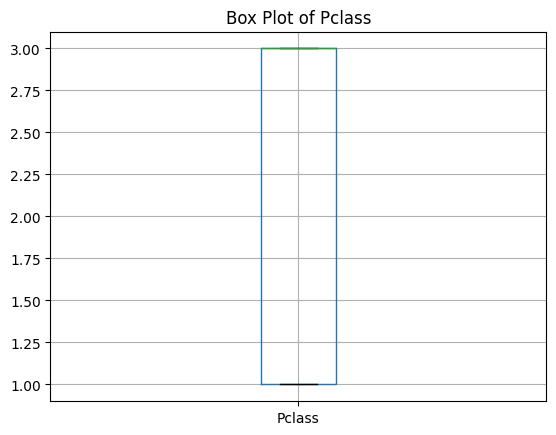

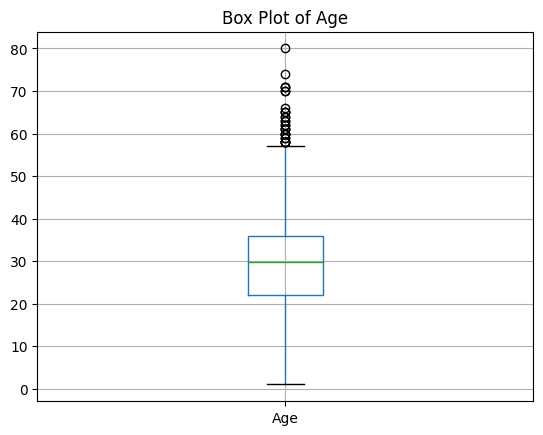

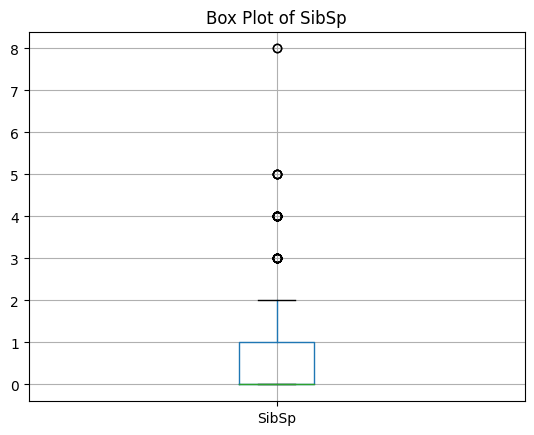

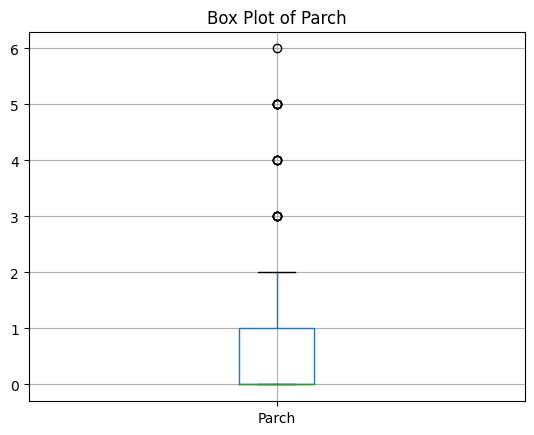

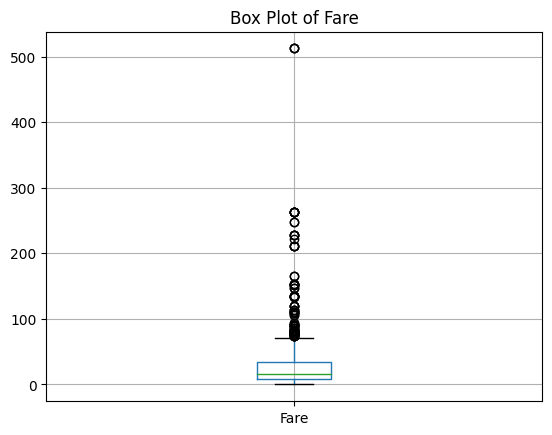

In [36]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns


for col in df[numeric_cols]:
    df.boxplot(column=col)
    plt.title(f'Box Plot of {col}')
    plt.show()

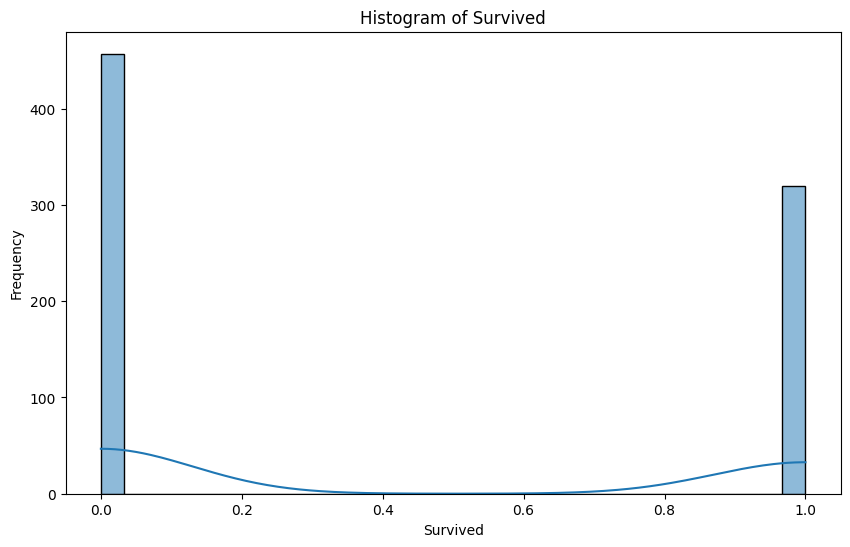

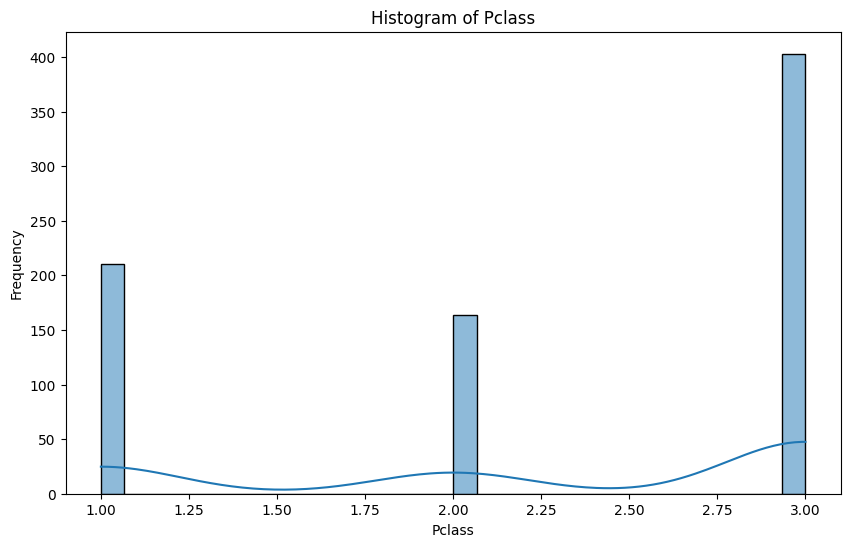

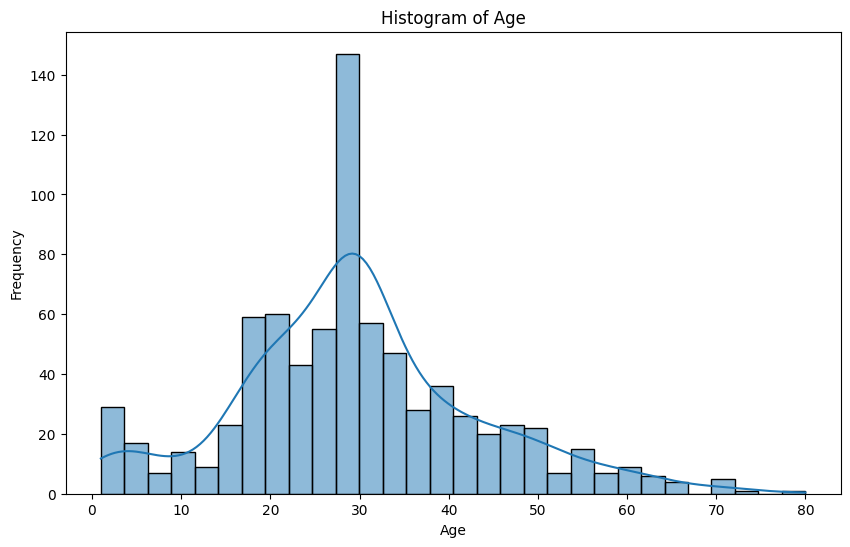

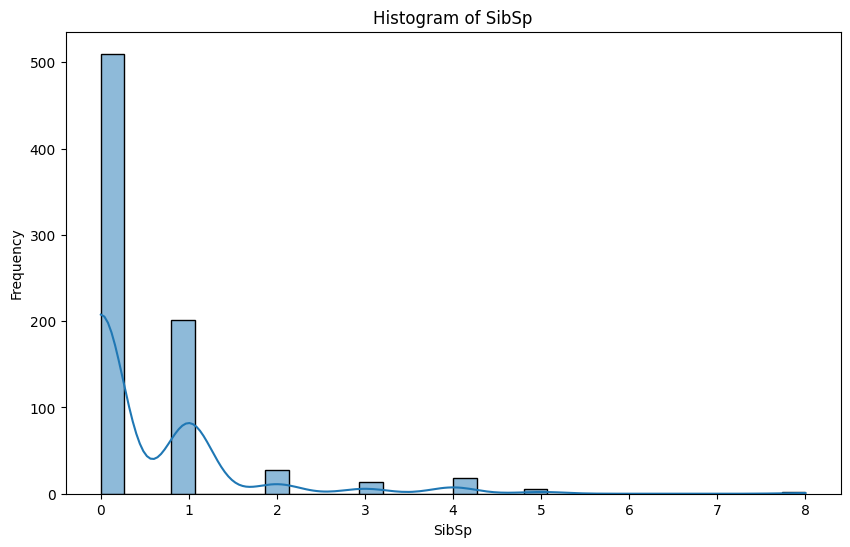

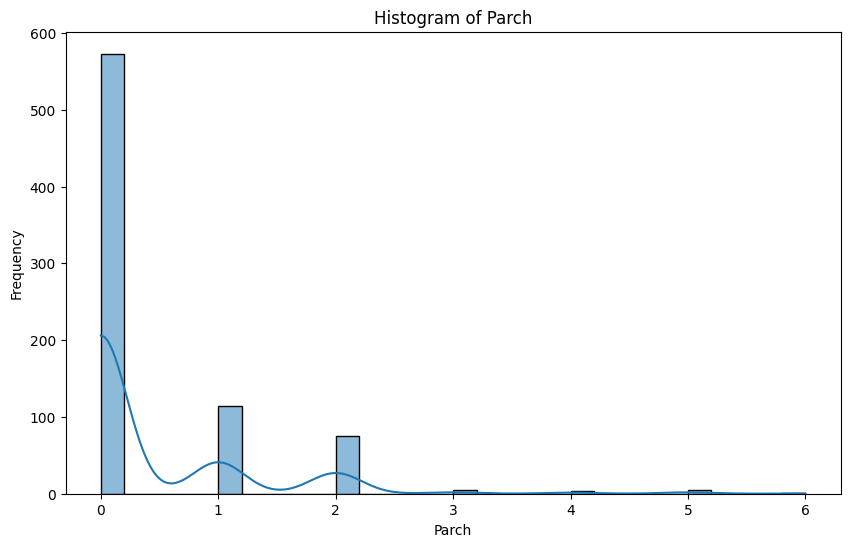

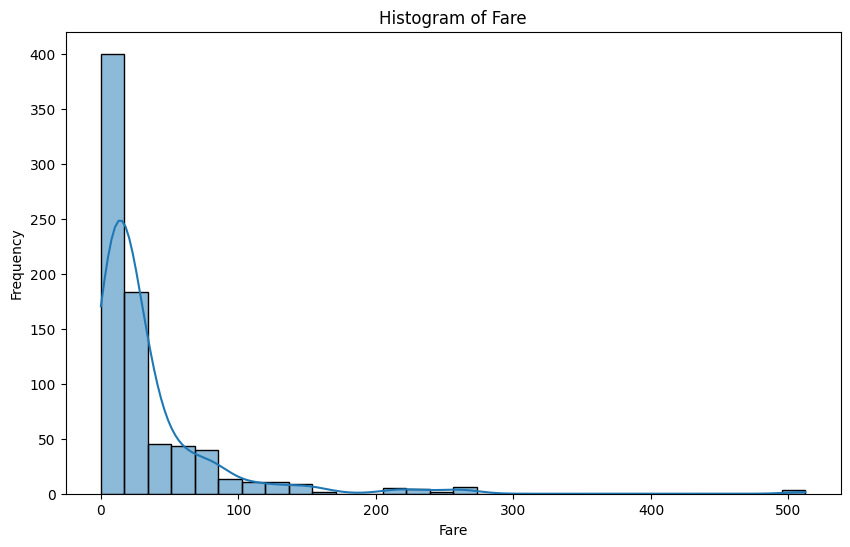

In [37]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns


for col in numeric_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], kde=True, bins=30)  # kde=True adds a Kernel Density Estimate line to the histogram
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [57]:
# sns.pairplot(df[numeric_cols])
# plt.show()

<ipython-input-38-b1a15f5ff759>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='viridis')


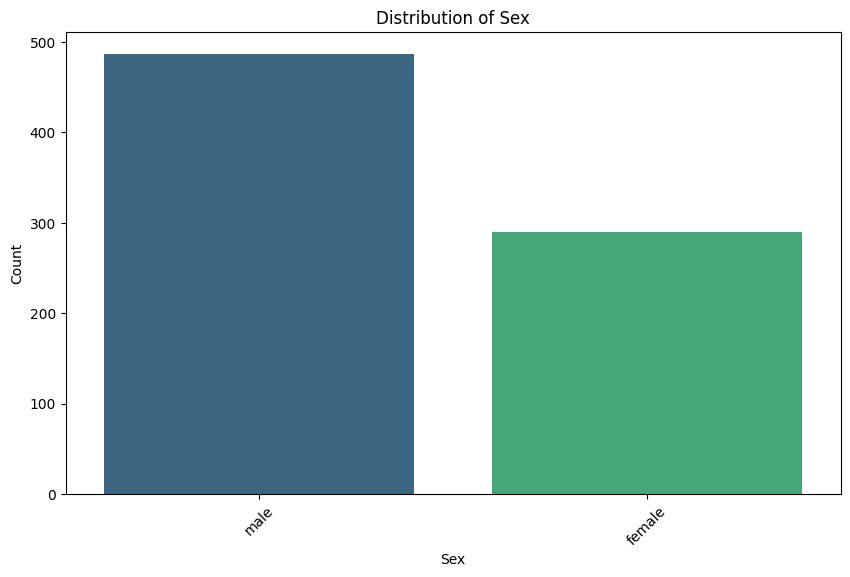

<ipython-input-38-b1a15f5ff759>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='viridis')


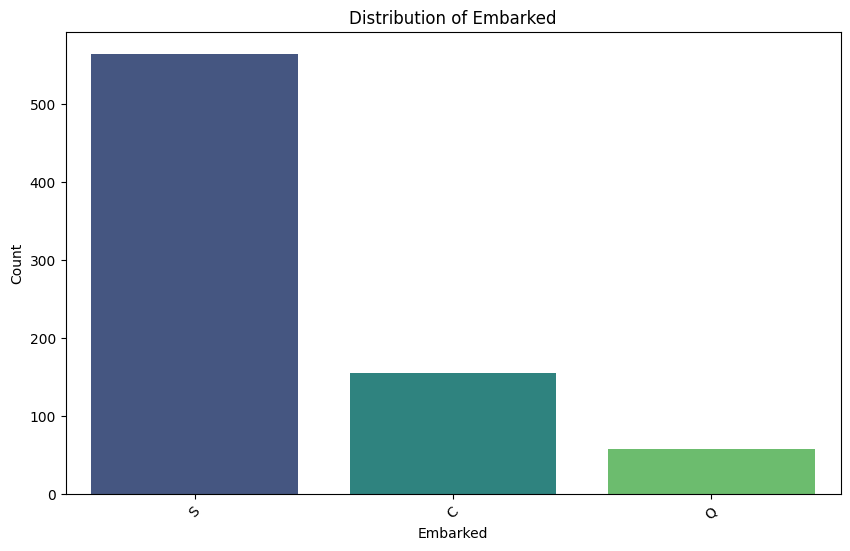

In [38]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in df :
    if col not in numeric_cols:
      plt.figure(figsize=(10, 6))
      sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='viridis')
      plt.title(f'Distribution of {col}')
      plt.xlabel(col)
      plt.ylabel('Count')
      plt.xticks(rotation=45)
      plt.show()

In [ ]:
df['Embarked'].value_counts()

,count
Embarked,
S,644
C,168
Q,77


In [ ]:
# from sklearn.tree import DecisionTreeClassifier, plot_tree

# tree = DecisionTreeClassifier(random_state=42)


# tree.fit(X_train ,y_train)

# y_pred4 =tree.predict(X_test)



# print(accuracy_score(y_pred4 ,y_test))
# print(classification_report(y_pred4 ,y_test))

0.7921348314606742
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       104
           1       0.77      0.72      0.74        74

    accuracy                           0.79       178
   macro avg       0.79      0.78      0.78       178
weighted avg       0.79      0.79      0.79       178



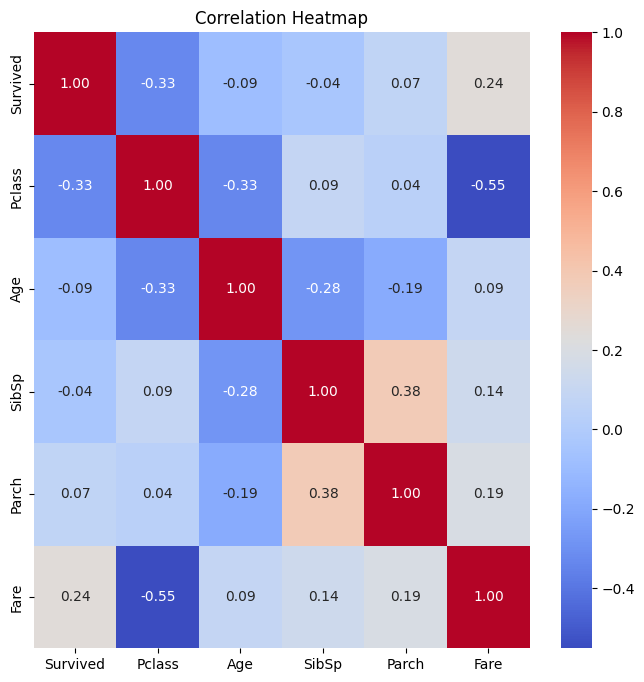

In [39]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
corr =df[numeric_cols].corr()

plt.figure(figsize=(8, 8))  # Adjust the figure size as needed
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [40]:
df =(pd.get_dummies(df)).astype(int)

df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22,1,0,7,0,1,0,0,1
1,1,1,38,1,0,71,1,0,1,0,0
2,1,3,26,0,0,7,1,0,0,0,1
3,1,1,35,1,0,53,1,0,0,0,1
4,0,3,35,0,0,8,0,1,0,0,1


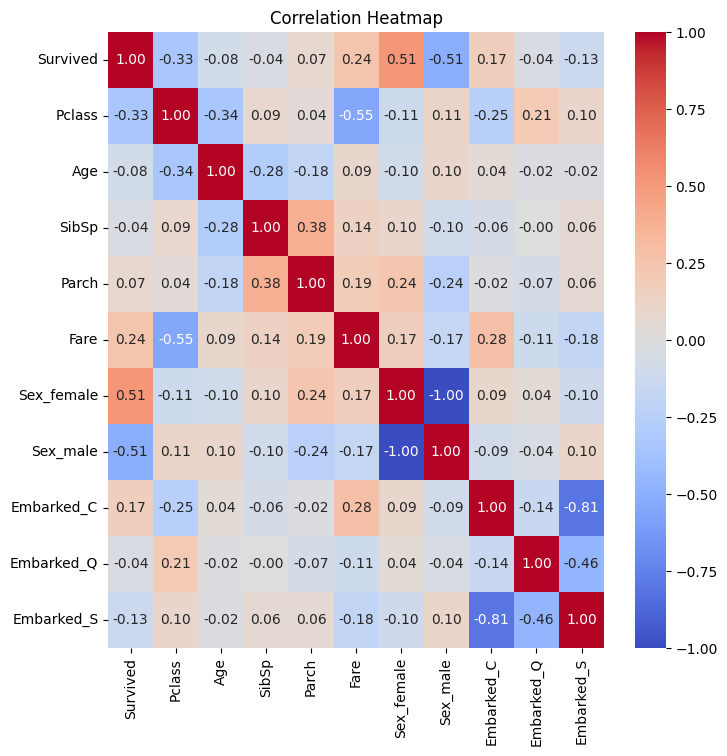

In [41]:
corr =df.corr()

plt.figure(figsize=(8, 8))  # Adjust the figure size as needed
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [43]:
from sklearn.preprocessing import  MinMaxScaler

#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(df[col])


col =['Age' ,'Fare' ]

scaler = MinMaxScaler()

X_scaled = scaler.fit_transform(df[col])



df[col] = pd.DataFrame(X_scaled, columns=col, index=df.index)

df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,0.265823,1,0,0.013672,0,1,0,0,1
1,1,1,0.468354,1,0,0.138672,1,0,1,0,0
2,1,3,0.316456,0,0,0.013672,1,0,0,0,1
3,1,1,0.430380,1,0,0.103516,1,0,0,0,1
4,0,3,0.430380,0,0,0.015625,0,1,0,0,1


In [45]:
X_data =df.drop('Survived' ,axis=1)
y_data =df['Survived']

X_train ,X_test ,y_train ,y_test =train_test_split(X_data ,y_data ,test_size=.2 ,random_state=42)


print('X_train ' ,X_train.shape)
print('X_test ' ,X_test.shape)
print('y_train ' ,y_train.shape)


X_train  (621, 10)
X_test  (156, 10)
y_train  (621,)


In [46]:
lr =LogisticRegression()

lr.fit(X_train ,y_train)

y_pred =lr.predict(X_test)


print(accuracy_score(y_pred ,y_test))
print(classification_report(y_pred ,y_test))

0.7948717948717948
              precision    recall  f1-score   support

           0       0.90      0.77      0.83       100
           1       0.67      0.84      0.75        56

    accuracy                           0.79       156
   macro avg       0.78      0.80      0.79       156
weighted avg       0.81      0.79      0.80       156



In [49]:
lr =LogisticRegression(class_weight={0:10 ,1:30})

lr.fit(X_train ,y_train)

y_pred =lr.predict(X_test)


print(accuracy_score(y_pred ,y_test))
print(classification_report(y_pred ,y_test))

0.7884615384615384
              precision    recall  f1-score   support

           0       0.73      0.86      0.79        73
           1       0.86      0.72      0.78        83

    accuracy                           0.79       156
   macro avg       0.79      0.79      0.79       156
weighted avg       0.80      0.79      0.79       156



In [53]:
svm =SVC(kernel='linear')

svm.fit(X_train ,y_train)

y_pred2 =svm.predict(X_test)


print(accuracy_score(y_pred2 ,y_test))
print(classification_report(y_pred2 ,y_test))

0.7884615384615384
              precision    recall  f1-score   support

           0       0.88      0.77      0.82        99
           1       0.67      0.82      0.74        57

    accuracy                           0.79       156
   macro avg       0.78      0.80      0.78       156
weighted avg       0.81      0.79      0.79       156



In [54]:
knn =KNeighborsClassifier()


knn.fit(X_train ,y_train)

y_pred3 =knn.predict(X_test)



print(accuracy_score(y_pred3 ,y_test))
print(classification_report(y_pred3 ,y_test))


0.7692307692307693
              precision    recall  f1-score   support

           0       0.87      0.75      0.81       100
           1       0.64      0.80      0.71        56

    accuracy                           0.77       156
   macro avg       0.76      0.78      0.76       156
weighted avg       0.79      0.77      0.77       156



In [55]:
tree = DecisionTreeClassifier(random_state=42)


tree.fit(X_train ,y_train)

y_pred4 =tree.predict(X_test)



print(accuracy_score(y_pred4 ,y_test))
print(classification_report(y_pred4 ,y_test))

0.7692307692307693
              precision    recall  f1-score   support

           0       0.85      0.76      0.80        96
           1       0.67      0.78      0.72        60

    accuracy                           0.77       156
   macro avg       0.76      0.77      0.76       156
weighted avg       0.78      0.77      0.77       156

